In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cufflinks as cf
import cv2
import nltk
import string


from chart_studio import plotly as py 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data,wb
from nltk.corpus import stopwords

%matplotlib inline

In [75]:
# nltk.download_shell()

Loading Data

In [76]:
messages = [line.rstrip() for line in open(r".\data\SMSSpamCollection")]

Data Processing

In [77]:
print(len(messages))

5574


In [78]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [79]:
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [80]:
messages = pd.read_csv(r".\data\SMSSpamCollection", sep="\t",
                        names=["label","message"])

In [81]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [83]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [84]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Added New Columns

In [85]:
messages["length"] = messages["message"].apply(len)

In [86]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

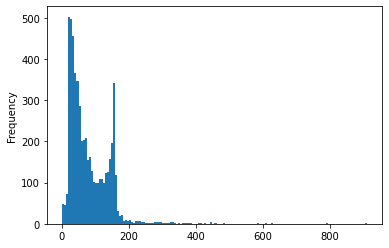

In [87]:
messages["length"].plot.hist(bins=150)

In [88]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [89]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [90]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

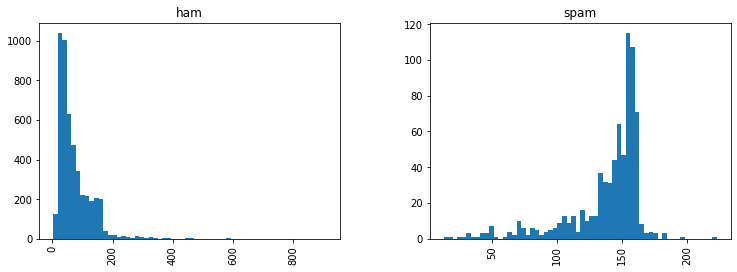

In [91]:
messages.hist(column="length", by="label", bins=60, figsize=(12,4))

In [92]:
mess = "Sample message! Notice: it has punctuation."

In [93]:
nopunc = [c for c in mess if c not in string.punctuation]

In [94]:
nopunc[:5]

['S', 'a', 'm', 'p', 'l']

In [95]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [96]:
nopunc = ''.join(nopunc)

In [97]:
nopunc

'Sample message Notice it has punctuation'

In [98]:
x = ['a','b','c']

In [99]:
'+++'.join(x)

'a+++b+++c'

In [100]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [101]:
class_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [102]:
class_mess

['Sample', 'message', 'Notice', 'punctuation']

Tokenized

In [103]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop word
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    

In [104]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [105]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transforner = CountVectorizer(analyzer=text_process)
bow_transforner.fit(messages["message"])

CountVectorizer(analyzer=<function text_process at 0x00000228F534BBE0>)

In [107]:
print(len(bow_transforner.vocabulary_))

11425


In [108]:
mess4 = messages['message'][3]

In [109]:
print(mess4)

U dun say so early hor... U c already then say...


In [110]:
bow4 = bow_transforner.transform([mess4])

In [111]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [112]:
print(bow4.shape)

(1, 11425)


In [113]:
bow_transforner.get_feature_names()[9554]

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



'say'

In [114]:
messages_bow = bow_transforner.transform(messages['message'])

In [115]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [116]:
messages_bow.nnz

50548

In [117]:
sparsity = (100.0 * messages_bow.nnz / messages_bow.shape[0] * messages_bow.shape[1])
print('sparsity: {}'.format(sparsity))

sparsity: 10364517.229002154


In [118]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(messages_bow)

TfidfTransformer()

In [119]:
tfidf4 = tfidf_transformer.transform(bow4)

In [120]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [121]:
tfidf_transformer.idf_[bow_transforner.vocabulary_['university']]

8.527076498901426

In [122]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [123]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()
spam_detect_model.fit(messages_tfidf, messages['label'])

MultinomialNB()

In [124]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [125]:
messages['label'][3]

'ham'

In [126]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [127]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [128]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [129]:
msg_train

1756              Really good:)dhanush rocks once again:)
2279    Hmm...Bad news...Hype park plaza $700 studio t...
2790          When you are big..| God will bring success.
3552                              I love you both too :-)
2756                                We r outside already.
                              ...                        
1661           No just send to you. Bec you in temple na.
1051            Are you available for soiree on June 3rd?
4940    Tomarrow i want to got to court. At  &lt;DECIM...
885     Yoyyooo u know how to change permissions for a...
3126    1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
Name: message, Length: 3900, dtype: object

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
pipeline_model = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
])

pipeline_model.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000228F534BBE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [132]:
predictions = pipeline_model.predict(msg_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1445
        spam       1.00      0.68      0.81       227

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

